In [27]:
from PIL import Image
import numpy as np
import cv2

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [29]:
import win32gui, win32ui, win32con, win32api

In [30]:
def screenshot(region=None):
    hwnd = 0 
# window ID , '0' means the activated window 
#get Divice Context
    hwndDC = win32gui.GetWindowDC(hwnd)
#get mfcDC
    mfcDC = win32ui.CreateDCFromHandle(hwndDC)
    saveDC = mfcDC.CreateCompatibleDC()
# create bigmap for picture saving
    saveBitMap = win32ui.CreateBitmap()
# get Moniter info
    MoniterDev = win32api.EnumDisplayMonitors(None, None)
   # print w,h　　　#picture size 
    if region:
        left,top,x2,y2 = region
        w = x2 - left + 1
        h = y2 - top + 1
    else:

        w = MoniterDev[0][2][2]
        h = MoniterDev[0][2][3]

# create bitmap space
    saveBitMap.CreateCompatibleBitmap(mfcDC, w, h)
# save the screenshot to saveBitmap
    saveDC.SelectObject(saveBitMap)
# from topleft（0，0）to bottomright（w，h）
    img = saveDC.BitBlt((0, 0), (w, h), mfcDC, (0, 0), win32con.SRCCOPY)
#saveBitMap.SaveBitmapFile(saveDC, filename) #이미지파일 저장인데 지금 필요없음
    signedIntsArray = saveBitMap.GetBitmapBits(True)
    img = np.fromstring(signedIntsArray, dtype='uint8')
    img.shape = (h,w,4)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB) 
    return img

In [31]:
img1 = screenshot((10, 10, 100, 100))
img2 = screenshot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


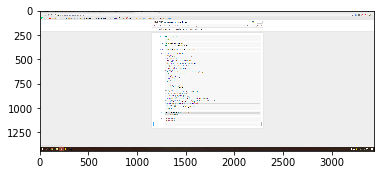

In [34]:
plt.imshow(img1)
plt.imshow(img2)